Santiago Suárez Sampayo

25-01-2020

# Análisis de las ventas de vehículos vendidos en Craiglist

El siguiente notebook busca responder los siguientes 4 puntos sobre los registros de vehículos vendidos a través de Craiglist: 
1. ¿Cuántas **regiones** diferentes hay y cuántos registros hay por cada **región**?
2. Generar un archivo con los registros que están **completos**, descartando aquellos que tienen alguno de sus campos **nulos**.
3. ¿Cuáles registros cuentan con el **price >= 15000** y la condición del vehículo sea **good** o **excellent**.
4. ¿Cuántos vehículos **azules** manufacturados por **Chevrolet** hay?




## Data
Los datos fueron tomados de [Kaggle](https://www.kaggle.com/austinreese/craigslist-carstrucks-data) y contienen información relevante provista por *Craiglist* sobre las **ventas de vehículos** en su plataforma.  

Los datos que se muestran corresponen al id, precio, condición, manufacturero, año y 20 categorías más sobre cada registro de ventas. 




## Outline
1. Data Cleaning
2. Análisis 
    - Respuesta a cada punto
    - Gráficas
3. Conclusión


In [1]:
# Se importan las librerías requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Primero creamos en nuestro notebook un dataframe llamado ventas con los datos provistos por Kaggle
# Index_col =0 -- permite no tener dos index columns 
ventas = pd.read_csv("vehicles.csv", index_col=0)


**Antes de empezar, un poco de contexto**

In [3]:
# A continuación se puede ver como luce la tabla original
ventas.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [4]:
# Para más detalles podemos obtener la información de cada columna cono el número de registros no nulos
# y el tipo de dato 
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            458213 non-null  int64  
 1   url           458213 non-null  object 
 2   region        458213 non-null  object 
 3   region_url    458213 non-null  object 
 4   price         458213 non-null  int64  
 5   year          457163 non-null  float64
 6   manufacturer  439993 non-null  object 
 7   model         453367 non-null  object 
 8   condition     265273 non-null  object 
 9   cylinders     287073 non-null  object 
 10  fuel          454976 non-null  object 
 11  odometer      402910 non-null  float64
 12  title_status  455636 non-null  object 
 13  transmission  455771 non-null  object 
 14  VIN           270664 non-null  object 
 15  drive         324025 non-null  object 
 16  size          136865 non-null  object 
 17  type          345475 non-null  object 
 18  pain

In [5]:
# Cuantas columnas hay para cada tipo de dato
ventas.dtypes.value_counts()

object     19
float64     4
int64       2
dtype: int64

In [6]:
# cuantos datos nulos hay por cada columna
pd.DataFrame(ventas.isna().sum().sort_values(),columns = ['# nulos'])


,# nulos
id,0
url,0
region,0
region_url,0
price,0
state,0
image_url,28
posting_date,28
description,70
year,1050


**Primeras impresiones**
1. La mayoría de categorías son del tipo **object (descriptivas)** 
2. Solo hay **6** columnas **sin datos nulos**
3. La gran mayoría tiene más de **2000 datos nulos**

## 1. Data Cleaning
Antes de empezar los respectivos análisis y responder a las preguntas, es necesario hacer un data cleaning o **limpieza de datos** que permita trabajar con ellos de mejor manera. 

En este caso vamos a 'limpiar' los registros de la columna **year** 

In [7]:
#Así lucen los registros de la columna 'year'
ventas['year']

0         2010.0
1         2014.0
2         2006.0
3         1974.0
4         2005.0
           ...  
458208    2014.0
458209    2018.0
458210    2014.0
458211    2008.0
458212    2008.0
Name: year, Length: 458213, dtype: float64

Como nos damos cuenta, los registros de la columna **year** son de tiplo float y contienen decimales. Dado que los registros de esta columna son números que representan años, **no tiene sentido que contengan decimales**. 

Para esto vamos a removerle el **'.' y el '0'** 

In [8]:
# Sencillamente convertimos los datos en Int, los cuales no se representan con decimales
ventas['year']=ventas['year'].astype('Int64')

In [9]:
#Así lucen los nuevos registros de la columna year
ventas['year']

0         2010
1         2014
2         2006
3         1974
4         2005
          ... 
458208    2014
458209    2018
458210    2014
458211    2008
458212    2008
Name: year, Length: 458213, dtype: Int64

## 2. Análisis

1. ¿Cuántas **regiones** diferentes hay y cuántos registros hay por cada **región**?


In [10]:
# Contamos los registros únicos de la columna 'region', es decir, cuantas regiones distinas hay
print('Regiones diferentes:',"\033[1m" + str(ventas['region'].nunique()))


Regiones diferentes: 405


In [11]:
#Mostrar el número de registros por región
region=ventas['region'].value_counts().to_frame()
region.columns=['# registros']
region

,# registros
columbus,3818
rochester,3592
jacksonville,3504
springfield,3293
fayetteville,2990
...,...
siskiyou county,28
susanville,17
"fort smith, AR",11
west virginia (old),11



En la anterior tabla se puede evidenciar el **# de registros por región**. Sin embargo, para tener una mejor perspectiva de esta información vamos a ver un par de **gráficas**.

In [12]:
# Gridline atrás de cualquier otro objeto
plt.rc('axes', axisbelow=True)

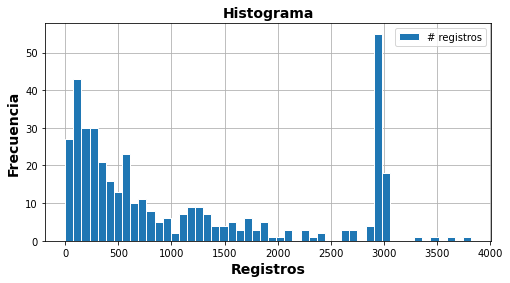

In [13]:
#Histograma 
region_hist=region.plot.hist(figsize=(8,4),bins=50,ec='w')
region_hist.grid(which='major')
region_hist.set_xlabel('Registros',fontdict=dict(weight='bold'),fontsize=14)
region_hist.set_ylabel('Frecuencia',fontdict=dict(weight='bold'),fontsize=14)
region_hist.set_title('Histograma',fontdict=dict(weight='bold'),fontsize=14)

plt.show()

El histograma muestra datos sesgados hacia la derecha, es decir, muchos de las regiones **tienen menos de 1000 registros**. Sin embargo,se evidencia un pico de más de **50 regiones con cerca de 3000 registros**. 

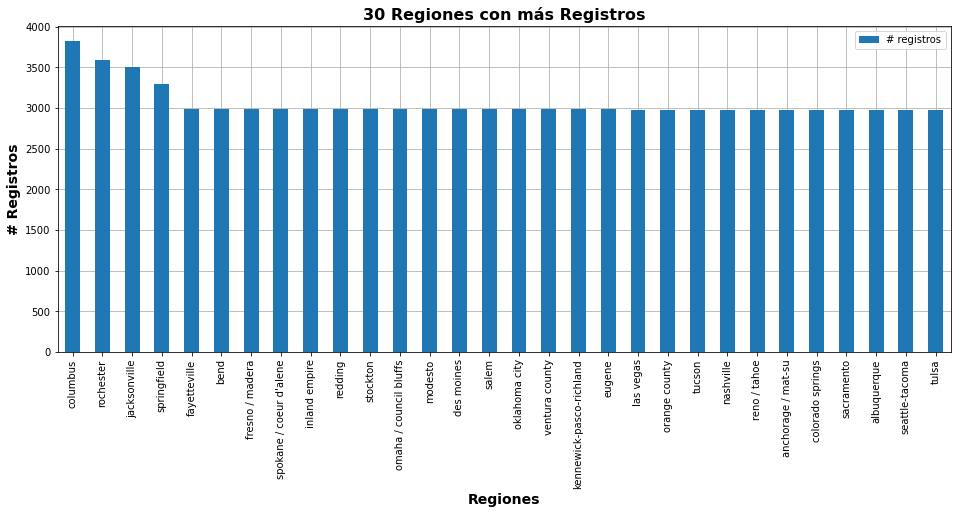

In [14]:
#Mostrar el # de registros de las 10 regiones con más registros
region_plt=region[:30].plot.bar(figsize=(16,6))
region_plt.grid(which='major')
region_plt.set_xlabel('Regiones',fontdict=dict(weight='bold'),fontsize=14)
region_plt.set_ylabel('# Registros',fontdict=dict(weight='bold'),fontsize=14)
region_plt.set_title('30 Regiones con más Registros',fontdict=dict(weight='bold'),fontsize=16)

plt.show()

Las **30 regiones** con más registros de ventas de vehículos en Craiglist tienen aproximadamente entre **2900 y 3900 registros**. Donde la mayoría cuentan con alrededor de **3000 registros**

In [16]:
# Calcular cuantas registros tienen las 30 regiones con respecto al total
regiones_30=region[:30].sum()
total=ventas['id'].count()

print('Las',"\033[1m"+'30 regiones con más registros tienen '+str(int(region[:30].sum().values))+"\033[0m",
     'registros y representan el '"\033[1m" +str(round(float(regiones_30/total*100),2))+'% del total registros')

Las 30 regiones con más registros tienen 91742 registros y representan el 20.02% del total registros


2. Generar un archivo con los registros que están **completos**, descartando aquellos que tienen alguno de sus campos **nulos**.

In [17]:
# Remover los registros o filas si en alguna columna existe un dato nulo
ventas_completas=ventas.dropna()

In [18]:
# Comprobar que en ninguna columna haya un dato nulo
ventas_completas.isna().sum()

id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [19]:
#porcentaje de registros completos con respecto al total
completos= ventas_completas['id'].count()
porcentaje_completos= str(round(float(completos/total*100),2))
print('Existen',"\033[1m"+str(completos),'registros completos'+"\033[0m",
     'y representan el '"\033[1m" +str(round(float(completos/total*100),2))+'% del total de registros')


Existen 42384 registros completos y representan el 9.25% del total de registros


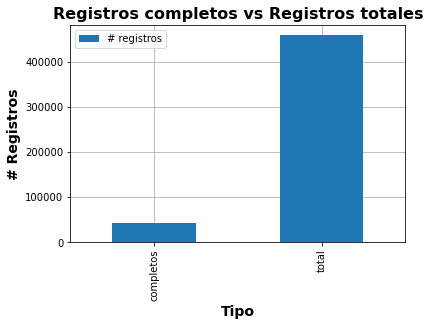

In [20]:
#Mostrar gráficamente diferencia entre registros completos vs totales
completos_data={'completos':[completos],'total':[total]}
completos_plt=pd.DataFrame(completos_data, index=['# registros']).transpose().plot.bar()
completos_plt.grid(which='major')
completos_plt.set_xlabel('Tipo',fontdict=dict(weight='bold'),fontsize=14)
completos_plt.set_ylabel('# Registros',fontdict=dict(weight='bold'),fontsize=14)
completos_plt.set_title('Registros completos vs Registros totales',fontdict=dict(weight='bold'),fontsize=16)
plt.show() 

In [ ]:
# Se genera un archivo con los registros completos
#ventas_completas.to_excel('ventas_completas.xlsx', index=False)




3. ¿Cuáles registros cuentan con el **price >= 15000** y la condición del vehículo sea **good** o **excellent**.


In [24]:
#porcentaje de registros con price >= 15000 con respecto al total
precio_15000=ventas[ventas['price']>=15000]['id'].count()
print('Existen',"\033[1m"+str(precio_15000),'registros con precio >=15000'+"\033[0m",
     'y representan el '"\033[1m" + str(round(precio_15000/total*100,2))+'% del total de datos válidos')


Existen 174248 registros con precio >=15000 y representan el 38.03% del total de datos válidos


In [25]:
#Número de registros con condición good o excellent
condicion=ventas['condition']
condicion.value_counts()

good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

In [26]:
#porcentaje de registros con condición good con respecto al total
good=condicion.value_counts().values[0]
print('Existen',"\033[1m"+str(good),'registros con condición good'+"\033[0m",
     'y representan el '"\033[1m" + str(round(good/total*100,2))+'% del total de registros'+"\033[0m")

#porcentaje de registros con condición excellent con respecto al total
excellent=condicion.value_counts().values[1]
print('Existen',"\033[1m"+str(excellent),'registros con condición excellent'+"\033[0m",
     'y representan el '"\033[1m" + str(round(excellent/total*100,2))+'% del total de registros')

Existen 115685 registros con condición good y representan el 25.25% del total de registros
Existen 115206 registros con condición excellent y representan el 25.14% del total de registros


In [27]:
#porcentaje de registros con condición good o excellent con respecto al total
good_excellent=good+excellent
print('Existen',"\033[1m"+str(good_excellent),'registros con condición excellent o good'+"\033[0m",
     'y representan el '"\033[1m" + str(round(good_excellent/total*100,2))+'% del total de registros')

Existen 230891 registros con condición excellent o good y representan el 50.39% del total de registros


In [28]:
#porcentaje de registros con precio>=15000 condición good o excellent con respecto al total
precio_condicion_filtro=ventas[((ventas['price']>=15000)& ((ventas['condition']=='good') | (ventas['condition']=='excellent')))]
precio_condicion=precio_condicion_filtro['id'].count()
print('Existen',"\033[1m"+str(precio_condicion),'registros con precio >=1500 y condición excellent o good'+"\033[0m",
     'y representan el '"\033[1m" + str(round(precio_condicion/total*100,2))+'% del total de registros')


Existen 86767 registros con precio >=1500 y condición excellent o good y representan el 18.94% del total de registros


In [33]:
#id de los registros de ventas de vehículos con precio >=15000 y con condición buena o excelente
precio_condicion_filtro['id'].to_frame()

,id
0,7240372487
4,7239983776
5,7239776805
6,7239425036
7,7238667661
...,...
458162,7240952591
458195,7240981040
458199,7240924844
458209,7240954682


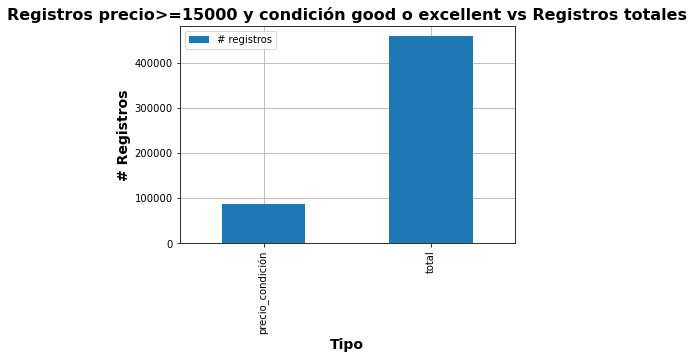

In [29]:
#Mostrar gráficamente diferencia entre registros con filtro de precio y condición vs totales
precio_condición_data={'precio_condición':[precio_condicion],'total':[total]}
precio_condición_plt=pd.DataFrame(precio_condición_data, index=['# registros']).transpose().plot.bar()
precio_condición_plt.grid(which='major')
precio_condición_plt.set_xlabel('Tipo',fontdict=dict(weight='bold'),fontsize=14)
precio_condición_plt.set_ylabel('# Registros',fontdict=dict(weight='bold'),fontsize=14)
precio_condición_plt.set_title('Registros precio>=15000 y condición good o excellent vs Registros totales',fontdict=dict(weight='bold'),fontsize=16)
plt.show() 

In [30]:
#Verificar que el precio sea >= 15000
precio_condicion_filtro[precio_condicion_filtro['price']<15000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date


In [31]:
#Verificar que la condición sea good o excellent
precio_condicion_filtro['condition'].value_counts()

good         52023
excellent    34744
Name: condition, dtype: int64

4. ¿Cuántos vehículos **azules** manufacturados por **Chevrolet** hay?


In [34]:
#porcentaje de registros con vehículos azules con respecto al total
azules=ventas[ventas['paint_color']=='blue']['id'].count()
print('Existen',"\033[1m"+str(azules),'registros de vehículos de color azul'+"\033[0m",
     'y representan el '"\033[1m" + str(round(azules/total*100,2))+'% del total de registros')

Existen 32746 registros de vehículos de color azul y representan el 7.15% del total de registros


In [35]:
#porcentaje de registros con vehículos manufacturados por Chevrolet con respecto al total
chevrolet=ventas[ventas['manufacturer']=='chevrolet']['id'].count()
print('Existen',"\033[1m"+str(chevrolet),'registros de vehículos manufacturados por Chevrolet'+"\033[0m",
     'y representan el '+"\033[1m" + str(round(chevrolet/total*100,2))+'% del total')

Existen 64977 registros de vehículos manufacturados por Chevrolet y representan el 14.18% del total


In [36]:
azul_chevrolet_filtro=ventas[(ventas['paint_color']=='blue')& (ventas['manufacturer']=='chevrolet')]
azul_chevrolet=azul_chevrolet_filtro['id'].value_counts().sum()
print('Existen',"\033[1m"+str(azul_chevrolet),'registros de vehículos azules manufacturados por Chevrolet'+"\033[0m",
     'y representan el '"\033[1m" + str(round(azul_chevrolet/total*100,2))+'% del total de registros'+"\033[0m"," y "+"\033[1m"+ 
      str(round(azul_chevrolet/chevrolet*100,2))+
      "%""\033[0m",'del total de vehículos manufacturados por'+"\033[1m",'Chevrolet')

Existen 4563 registros de vehículos azules manufacturados por Chevrolet y representan el 1.0% del total de registros  y 7.02% del total de vehículos manufacturados por Chevrolet


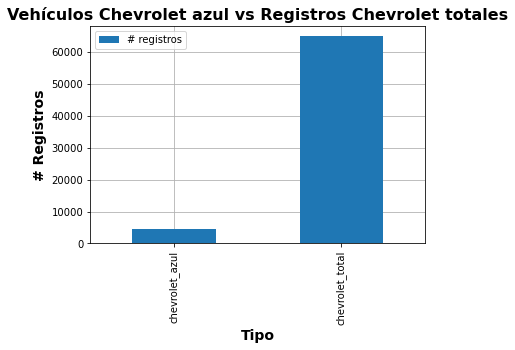

In [40]:
#Mostrar gráficamente diferencia entre registros Chevrolet azul y Chevrolet total
azul_chevrolet_data={'chevrolet_azul':[azul_chevrolet],'chevrolet_total':[chevrolet]}
azul_chevrolet_plt=pd.DataFrame(azul_chevrolet_data, index=['# registros']).transpose().plot.bar()
azul_chevrolet_plt.grid(which='major')
azul_chevrolet_plt.set_xlabel('Tipo',fontdict=dict(weight='bold'),fontsize=14)
azul_chevrolet_plt.set_ylabel('# Registros',fontdict=dict(weight='bold'),fontsize=14)
azul_chevrolet_plt.set_title('Vehículos Chevrolet azul vs Registros Chevrolet totales',fontdict=dict(weight='bold'),fontsize=16)
plt.show() 

In [37]:
#Verificar que el color sea azul
azul_chevrolet_filtro['paint_color'].value_counts()

blue    4563
Name: paint_color, dtype: int64

In [38]:
#Verificar que el manufacturero sea chevrolet
azul_chevrolet_filtro['manufacturer'].value_counts()


chevrolet    4563
Name: manufacturer, dtype: int64

## 3. Conclusión
- En conclusión, este análisis nos permitió evidenciar como se comportan los registros dependiendo de características como la **región, el precio, la condición, la marca y el precio**
- El rango de registros más común dependiendo de la región es de 3000
- Al deshacernos de registros con **datos nulos** en alguna de sus columnas obtemenos **menos del 10%** del total de registros
- **Menos del 20%** de registros tienen un **precio superior a 15000 dólares y una condición excelente o buena**, lo que nos puede dar una idea del tipo de carros que se venden a través de Craiglist
- Por último, los vehículos **Chevrolet** azules no son muy comunes entre los vehículos Chevrolet vendidos en Craiglist 